# Exercise 3.4

## Linear Dimensionality Reduction

In this task, we will visualize the main principle axes of the IRIS dataset. The dataset contains 150 datapoints of different irises' petal types (Setosa, Versicolour, and Virginica) which are characterized by the *sepal length, sepal width, petal length, and the petal width*. The task can also be thought of as projecting the high-dimensional dataset into lower dimensions (2D in our case) while retaining most of data information, for data exploratory purposes.

### Exercise 3.4.1

Implement the Principle Component Analysis (PCA) class. 

In [1]:
import numpy as np


class PCA:
  '''
  This class computes the first n eigenvectors from the dataset via fit(), and 
  projects the original data to the subspace spanned by its eigenvectors via 
  transform().
  '''
  def __init__(self, n_components):
    '''      
    Args:
        n_components (int): number of principle components. n_components <= d
    '''
    self.n_components = n_components
    self.components = None  # expected size [n_components, d] 
    self.mean = None  # expected size [d]

  def fit(self, X):
    '''
    Compute the first n_components of eigenvectors from data, and store them
    in self.components.
    
    Args:
        X: Array of m points (m, d).
    '''
    # TODO: Your code here
    m, d = X.shape
    self.mean = np.mean(X, axis=0)
    diff = X - self.mean
    cov = diff.T @ diff
    cov = cov / m
    w, v = np.linalg.eigh(cov)
    self.components = v.T[-self.n_components:]
    
    
    

  def transform(self, X):
    '''
    Project the data into the n_components of eigenvectors.
    
    Args:
        X: Array of m points (m, d).

    Returns:
        X_projected: X: Array of m points (m, n_components).
    '''
    # TODO: Your code here
    return (X - self.mean) @ self.components.T

### Exercise 3.4.2
Use the PCA class to visualize the IRIS dataset in the first two principle components. The data points are also needed to be colored according to their distinct classes. Are the classes separable with linear discriminators?

**Hint:** Use `plt.scatter` to plot the projected data points with colors.

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


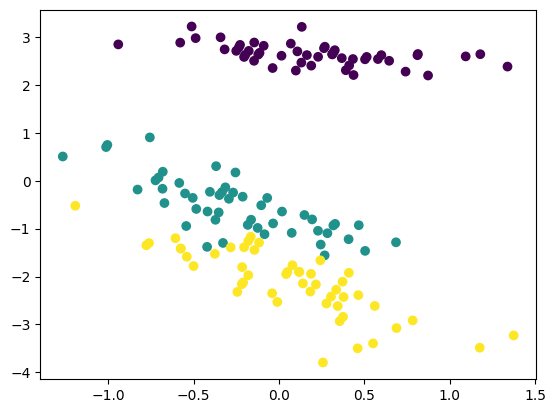

In [9]:
# Imports
import matplotlib.pyplot as plt
from sklearn import datasets


data = datasets.load_iris()
X = data.data
y = data.target

# Project the data onto the 2 primary principal components
# TODO: Your code here
pca = PCA(n_components=2)
pca.fit(X)
X_projected = pca.transform(X)
print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)

# visualize the projected data
# TODO: Your code here
plt.scatter(X_projected[:,0],X_projected[:,1],c=y)

The classes do not seem to be linear seperable, more specifically the green and yellow class.